# Predição dos Sobreviventes do Titanic 

#### Conteúdo:

 1. Importação das bibliotecas do python
 2. Leitura e Análise dos Dados
 3. Visualização dos Dados
 4. Limpeza dos Dados
 5. Modelos de Predição
 
 

## 1. Importação das bibliotecas do python 

Antes de tudo, é necessário importar as bibliotecas do python que utilizaremos para análisar e predizer o conjunto de dados do titanic.


In [68]:
# bibliotecas de análise dos dados
import numpy as np
import pandas as pd

# bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')


## 2. Leitura e Análise Exploratória

Para iniciar a nossa análise, precisamos realizar a leitura dos datasets de treino e teste usando a função `pd.read_csv()` do pandas, anteriormente importado.


In [69]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

Podemos também utilizar algumas funcões do pandas para entender melhor nosso conjunto de dados, como `describe()` e `info()`

In [70]:
treino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 - **Features Numéricas:** Age(Contínua), Fare(Contínua), SibSp(Discreta), Parch(Discreta)
 - **Features Categóricas:** Survived, Sex, Embarked, Pclass, Ticket, Cabin
 
Breve descrição e tipo de dados das features:
 
 
 * **Survival (Int):** Informa 1 se o passageiro sobreviveu e 0 caso não.
 * **Pclass (Int):** Classe do passageiro (1 = 1ª classe; 2 = 2ª classe; 3 = 3ª classe)
 * **Name (string):** Nome do passageiro
 * **Sex (string):** Sexo do passageiro
 * **Age (float):** Idade do passageiro
 * **SibSp (int):** sigla para "Siblings/Spouses", ou seja, o número de irmãos e parceiros conjulgais que o passageiro tinha consigo a bordo do navio. Contam-se também a quantidade de meio-irmãos e meio-irmãs.
 * **Parch (int):** sigla para "Parents/Child", ou seja, o número de filhos, filhas pais e mães que o passageiro levava consigo a bordo do navio. Contam-se também  a quantidade de padrastos e madrastas. 
 * **Ticket (string):** Número do ticket da viagem.
 * **Fare (float):** valor da tarifa paga pelo passageiro na época em libras esterlinas.
 * **Cabin (string):** número da cabine onde o passageiro ficou hospedado. 
 * **Embarked (string):** Porto de embarque do passageiro (C = Cherbourg; Q = Queenstown; S = Southampton)
 
 
 Agora que sabemos exatamente o significado de cada uma das nossas features, podemos ver o quanto de informação cada uma delas tem para nos dar.


In [20]:
# Descrição breve do nosso dataset
treino.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barber, Miss. Ellen ""Nellie""",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Visualizando novamente o resultado do comando `treino.info()` executado acima, podemos fazer algumas observações:

* Existem 891 passageiros no nosso conjunto de treino
* Estão faltando 177 valores sobre a idade dos passageiros. (Cerca de 19,8%)
* Estão faltando 687 valores sobre a cabine dos passageiros. (cerca de 77.1%)
* Estão faltando 2 valores sobre o porto de embarque dos passageiros. (Cerca de 0.22%)

## 3. Visualização dos dados

Chegou o momento de usarmos alguns gráficos para entendermos melhor como nossas features estão distribuidas e relacionadas.



### Sex Feature

Porcentagem de mulheres que sobreviveram: 74.20382165605095
Porcentagem de homens que sobreviveram: 18.890814558058924


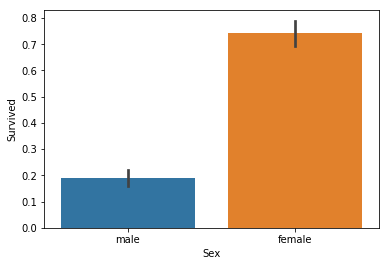

In [39]:
# Passageiros que sobreviveram separados pelo sexo
sns.barplot(x='Sex', y='Survived', data=treino)
print("Porcentagem de mulheres que sobreviveram: {}".format( treino["Survived"][treino["Sex"] == 'female'].value_counts(normalize=True)[1]*100))
print("Porcentagem de homens que sobreviveram: {}".format( treino["Survived"][treino["Sex"] == 'male'].value_counts(normalize=True)[1]*100))

Podemos perceber claramente com o gráfico acima que mulheres são mais provaveis de sobreviver do que homens

### SibSp Feature



porcentagem de SibSp = 0 que sobreviveram: 34.53947368421053
porcentagem de SibSp = 1 que sobreviveram: 53.588516746411486
porcentagem de SibSp = 2 que sobreviveram: 46.42857142857143
porcentagem de SibSp = 3 que sobreviveram: 25.0
porcentagem de SibSp = 4 que sobreviveram: 16.666666666666664


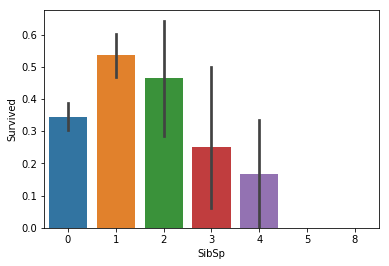

In [45]:
# gráfico de barras para o Número de SibSp vs Survival
sns.barplot(x='SibSp', y='Survived', data=treino)

print("porcentagem de SibSp = 0 que sobreviveram: {}".format(treino["Survived"][treino["SibSp"] == 0].value_counts(normalize = True)[1]*100))
print("porcentagem de SibSp = 1 que sobreviveram: {}".format(treino["Survived"][treino["SibSp"] == 1].value_counts(normalize = True)[1]*100))
print("porcentagem de SibSp = 2 que sobreviveram: {}".format(treino["Survived"][treino["SibSp"] == 2].value_counts(normalize = True)[1]*100))
print("porcentagem de SibSp = 3 que sobreviveram: {}".format(treino["Survived"][treino["SibSp"] == 3].value_counts(normalize = True)[1]*100))
print("porcentagem de SibSp = 4 que sobreviveram: {}".format(treino["Survived"][treino["SibSp"] == 4].value_counts(normalize = True)[1]*100))

Com esse gráfico, também podemos observar que o número de pessoas com menos de 5 irmãos ou conjulgues tem uma probabilidade maior de sobreviver
do que passageiros com mais de 4 irmãos ou conjulgues.


### Parch Feature

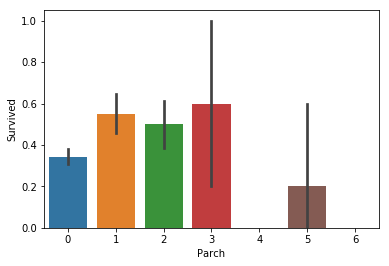

In [46]:
sns.barplot(x="Parch", y="Survived", data=treino)

Passageiros com menos de 4 pais ou filhos a bordo tem mais chances de sobreviver. Além disso, quem está viajando sozinho tem menos chances de sobreviver do que os acompanhados. 

### Pclass Feature


Porcentagem de pessoas da 1ª classe que sobreviveram: 62.96296296296296
Porcentagem de pessoas da 2ª classe que sobreviveram: 47.28260869565217
Porcentagem de pessoas da 3ª classe que sobreviveram: 24.236252545824847


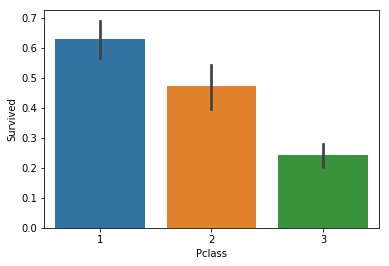

In [51]:
sns.barplot(x="Pclass", y="Survived", data=treino)
print("Porcentagem de pessoas da 1ª classe que sobreviveram: {}".format(treino['Survived'][treino['Pclass'] == 1].value_counts(normalize=True)[1]*100))
print("Porcentagem de pessoas da 2ª classe que sobreviveram: {}".format(treino['Survived'][treino['Pclass'] == 2].value_counts(normalize=True)[1]*100))
print("Porcentagem de pessoas da 3ª classe que sobreviveram: {}".format(treino['Survived'][treino['Pclass'] == 3].value_counts(normalize=True)[1]*100))
      

Passageiros viajando na primeira classe tem chances maiores de sobreviver do que os que viajam nas classes inferiores.

### Age Feature


Para criar gráficos que nos deem alguma informação sobre a idade dos passageiros, primeiro iremos substituir os valores faltantes pela média de todas as idades.

In [75]:
print("Média das idades: {}".format(treino['Age'].mean()))

Média das idades: 29.758888888888887


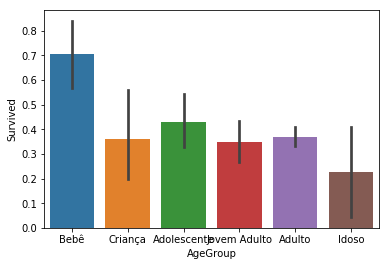

In [80]:
#substituindo pela média arredondada.
treino['Age'] = treino["Age"].fillna(30)
bins = [0, 5, 12, 18, 24, 60, np.inf]
labels = [ 'Bebê', 'Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']
treino['AgeGroup'] = pd.cut(treino["Age"], bins, labels = labels)
teste['AgeGroup'] = pd.cut(teste["Age"], bins, labels = labels)
sns.barplot(x="AgeGroup", y="Survived", data=treino)

Podemos ver que os bebes foram os passageiros que mais tem probabilidade de sobreviver, seguido pelos adolescentes. Jovens adultos, adultos e crianças tiveram uma taxa de sobrevivência parecida. Já os idosos foram os que menos sobreviveram.